# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
#inspect data set
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
def ecdf(data):
    ''' Calculate the empirical cumulative distribution function of a single measure. '''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    return (x, y)

___
## Question 1
*Is the distribution of body temperature normal?*

First, I will use a graphical approach to compare the cumulative density function (CDF) of the empirical data to the spread of CDFs for samples drawn from the normal distribution.
___

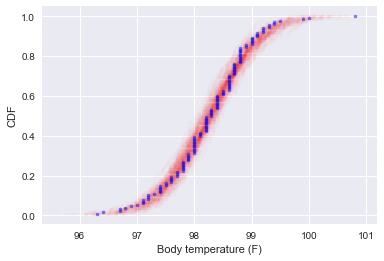

In [4]:
#compute descriptive stats to draw normal samples
temp_mean = df.temperature.mean()
temp_std = df.temperature.std()
n_obs = len(df.temperature)

sns.set()

# draw 100 samples from the normal distribution to compare to empirical cdf, and plot them
for i in range(100):
    temp_normal_sample = np.random.normal(temp_mean, temp_std, size=n_obs)
    temp_normal_cdf = ecdf(temp_normal_sample)
    plt.plot(temp_normal_cdf[0], temp_normal_cdf[1], marker='.', linestyle='none', color='red', alpha=0.01)

# plot empirical cdf
temperature_ecdf = ecdf(df.temperature)
plt.plot(temperature_ecdf[0], temperature_ecdf[1], marker='.', linestyle='none', color='blue', alpha=0.5)
plt.xlabel('Body temperature (F)')
plt.ylabel('CDF')
plt.show()

___
The empirical CDF tracks within the range of normal samples, suggesting that the distribution is normal.
___

In [5]:
# perform Shapiro-Wilk test for normality
shapiro_w, shapiro_p = stats.shapiro(df.temperature)
print('W statistic: ', shapiro_w, '\np-value: ', shapiro_p)

W statistic:  0.9865769743919373 
p-value:  0.2331680953502655


___
The result of the Shapiro-Wilk test also suggests that the null hypothesis that the temperature data are normally distributed cannot be rejected.
___

___
## Question 2

*Is the sample size large enough?*

The sample size of 130 is larger than the standard n >= 30 rule-of-thumb, so this should be enough observations for the Central Limit Theorem to apply.

*Are the observations independent?*

Each of the observations is from a different person, so independence can be assumed.
___

___
## Question 3

*Is the true population mean really 98.6 degrees F?* 

The null hypothesis here is that the true population mean is 98.6 degrees F. Therefore, for bootstrap testing, samples will be drawn from a mean-adjusted version of the empirical data set. Then, a p-value will be calculated for the empirical mean.
___

In [6]:
# adjust the mean of the data to 98.6
empirical_mean = df.temperature.mean()
print('empirical mean: ', empirical_mean)
temps_mean_adjusted = df['temperature'] - empirical_mean + 98.6

# initialize numpy array for 10,000 replications
n_reps = 10000
bs_mean_reps = np.empty(n_reps)

# run 10,000 bootstrap mean replications
for i in range(n_reps):
    bs_mean_reps[i] = temps_mean_adjusted.sample(n=n_obs, replace=True).mean()

bootstrap_mean_p = np.sum(bs_mean_reps <= empirical_mean) / len(bs_mean_reps)
print('p-value: ', bootstrap_mean_p)

empirical mean:  98.24923076923078
p-value:  0.0


___
A p-value of 0 means that none of the 10,000 bootstrap samples had a mean at or below the empirical mean. This indicates a true p-value below 0.0001, which is sufficient to reject the null hypothesis that the true population mean is 98.6 degrees F.

With regard to frequentist hypothesis testing, a one-sample test is appropriate here, since only one of the comparison groups has full sample data. For Carl Wunderlich's data, only the mean is available. The t-score is also more appropriate than the z-score, because the z-test preferably uses the population standard deviation, which is unavailable here.
___

In [7]:
# perform one-sample t-test
t_score, ttest_p = stats.ttest_1samp(df.temperature, 98.6)

print('t-score: ', t_score, '\np-value: ', ttest_p)

t-score:  -5.4548232923645195 
p-value:  2.4106320415561276e-07


___
The t-test returns a very small p-value, sufficient to reject the null hypothesis that the means are the same. 
___

In [11]:
# perform one-sample z-test
from statsmodels.stats.weightstats import ztest
z_stat, ztest_p = ztest(df.temperature, value=98.6)

print('z-stat: ', z_stat, '\np-value: ', ztest_p)


z-stat:  -5.4548232923645195 
p-value:  4.9021570141012155e-08


___
The z-test also returns a very small p-value. This indicates that we can safely reject the null hypothesis that this sample was drawn from a population with a mean body temperature of 98.6 degrees F.
___

## Question 4

In [16]:
# repeat frequentist tests on a sample of size 10
df_small_samp = df.sample(n=10)

t_score, ttest_p = stats.ttest_1samp(df_small_samp.temperature, 98.6)
print('t-score: ', t_score, '\np-value: ', ttest_p)

z_stat, ztest_p = ztest(df_small_samp.temperature, value=98.6)
print('z-stat: ', z_stat, '\np-value: ', ztest_p)

t-score:  -0.5961196035938453 
p-value:  0.5657843461624246
z-stat:  -0.5961196035938453 
p-value:  0.5510953289525224


___
Repeatedly running this cell shows that the test statistic and p-value vary dramatically depending on the specific sample taken, so not much information can be drawn from this exercise. 

However, in general, a sample of size less than 30 will have a sample mean that is distributed more on a t-distribution than a z-distribution. Therefore, a t-test is more appropriate for small sample sizes like this.
___

___
## Question 5 
*At what temperature should we consider someone's temperature to be "abnormal"?*
___

___
## Question 6
*Is there a significant difference between males and females in normal temperature?*

I will use a t-test to compare the sample means for men and women, as this is the standard test for comparing the means of two samples. A t-test is also simpler to run than a bootstrap test, and is theoretically robust.

The null hypothesis is that the means are equal, while the alternate hypothesis is that the means are not equal (i.e. a two-tailed p-value).
___

In [26]:
male = df[df.gender == 'M']
female = df[df.gender == 'F']

# view mean temperature by gender
print('male mean: ', male.temperature.mean())
print('female mean: ', female.temperature.mean())
print('---')

# inspect standard deviations to ensure pooled variance is appropriate
print('male std: ', male.temperature.std())
print('female std: ', female.temperature.std())

male mean:  98.1046153846154
female mean:  98.39384615384613
---
male std:  0.6987557623265908
female std:  0.7434877527313665


In [27]:
# perform two-sample independent t-test with pooled variance
t_stat, ttest_p = stats.ttest_ind(male.temperature, female.temperature)

print('t-statistic: ', t_stat, '\np-value: ', ttest_p)

t-statistic:  -2.2854345381656103 
p-value:  0.02393188312239561


The t-statistic is statistically significant at a level of alpha = 0.05. This indicates that we can reject the null hypothesis that the means for men and women are the same.

## Story

The main question here is whether 98.6 degrees F is the true population mean for human body temperature. Multiple tests all suggest that 98.6 is not the true average body temperature. From bootstrap testing and a z-test, we can see that the chance we would get our dataset as a sample from a population of mean 98.6 is vanishingly small (p < 0.0001 in both tests). The t-test, in agreement with the bootstrap and z-test, indicates that the sample mean of 98.25 is significantly different from the theoretical mean of 98.6.

For the secondary question of whether men and women have the same average normal body temperature, a two-sample, independent, pooled variances t-test indicates that the samples of men and women do not have the same mean (p < 0.05). The sample means suggest, instead, that women have a slightly higher mean body temperature than men (98.4 vs 98.1 degrees F).